In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests 
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000 , high = 90.000 , size = 1500)
lngs = np.random.uniform(low = -180.000 , high = 180.000 ,size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

28.430565931212115 53.38620867108611
67.41747781685243 -162.94354583702915
-86.0062819780189 -116.53793682666179
13.67280252763598 90.2874929535214
-0.5191829606426381 -3.441217503678587
-72.28257375500442 -67.97784775410209
83.8338644734329 2.503436348211494
-42.923934729775944 57.81757040701223
-11.77902298493423 43.960114174615455
-70.89138166963967 -113.21225069308967
-46.278767188880785 -164.82214170357503
43.34263089442149 135.7764907667128
2.5706980162784134 13.635617103162133
-51.33996559513747 -119.38225859060145
-7.196425260770752 119.0894164590905
38.33423921843277 141.4475244396947
-40.94789862532546 -179.82274228345517
-48.743233965889665 13.82905418289971
51.834479358172075 -62.54416772175895
-87.9947649186432 6.496178599924747
-10.910775662293162 76.63585728672427
-39.638666012802474 -2.7703566644757984
24.178727718318314 -37.79838116606632
76.7001384678291 -68.15675507746353
-86.21096084186597 -82.69606497234534
-11.372066534649207 158.4975196756717
-67.37317897227302 8

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
import citipy
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    #print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
         # citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
  # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key        

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jahrom
City not found. Skipping...
Processing Record 2 of Set 1 | nome
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | port blair
Processing Record 5 of Set 1 | axim
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | fomboni
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | olga
Processing Record 12 of Set 1 | sembe
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | bima
Processing Record 15 of Set 1 | ishinomaki
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | havre-saint-pierre
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | ponta do sol
Proces

Processing Record 37 of Set 4 | teguise
Processing Record 38 of Set 4 | isangel
Processing Record 39 of Set 4 | grand centre
City not found. Skipping...
Processing Record 40 of Set 4 | samusu
City not found. Skipping...
Processing Record 41 of Set 4 | solnechnyy
Processing Record 42 of Set 4 | luebo
Processing Record 43 of Set 4 | albany
Processing Record 44 of Set 4 | quesnel
Processing Record 45 of Set 4 | sirjan
Processing Record 46 of Set 4 | hasaki
Processing Record 47 of Set 4 | soyo
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | achi
Processing Record 50 of Set 4 | torbay
Processing Record 1 of Set 5 | vardo
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | acarau
Processing Record 4 of Set 5 | adrar
Processing Record 5 of Set 5 | balkhash
Processing Record 6 of Set 5 | vestmannaeyjar
Processing Record 7 of Set 5 | port hedland
Processing Record 8 of Set 5 | pangnirtung
Processing Record 9 of Set 5 | balikpapan
Processing Recor

Processing Record 25 of Set 8 | smithers
Processing Record 26 of Set 8 | vanavara
Processing Record 27 of Set 8 | moerai
Processing Record 28 of Set 8 | mogadishu
Processing Record 29 of Set 8 | mabaruma
Processing Record 30 of Set 8 | rodrigues alves
Processing Record 31 of Set 8 | noumea
Processing Record 32 of Set 8 | zyryanka
Processing Record 33 of Set 8 | alta floresta
Processing Record 34 of Set 8 | biu
Processing Record 35 of Set 8 | sambava
Processing Record 36 of Set 8 | longlac
City not found. Skipping...
Processing Record 37 of Set 8 | okha
Processing Record 38 of Set 8 | bosaso
Processing Record 39 of Set 8 | nanortalik
Processing Record 40 of Set 8 | imeni zhelyabova
Processing Record 41 of Set 8 | inta
Processing Record 42 of Set 8 | akaltara
Processing Record 43 of Set 8 | sun city west
Processing Record 44 of Set 8 | vitim
Processing Record 45 of Set 8 | tsnori
Processing Record 46 of Set 8 | oussouye
Processing Record 47 of Set 8 | chambas
Processing Record 48 of Set 

Processing Record 13 of Set 12 | erzin
Processing Record 14 of Set 12 | oistins
Processing Record 15 of Set 12 | apollonia
Processing Record 16 of Set 12 | yagoua
Processing Record 17 of Set 12 | high rock
Processing Record 18 of Set 12 | zastron
Processing Record 19 of Set 12 | potiskum
Processing Record 20 of Set 12 | lotung
City not found. Skipping...
Processing Record 21 of Set 12 | svetlyy
Processing Record 22 of Set 12 | bacolod
Processing Record 23 of Set 12 | douentza
Processing Record 24 of Set 12 | bara
Processing Record 25 of Set 12 | road town
Processing Record 26 of Set 12 | bermejo
Processing Record 27 of Set 12 | guaiuba
Processing Record 28 of Set 12 | russell
Processing Record 29 of Set 12 | suntar
Processing Record 30 of Set 12 | yaan
Processing Record 31 of Set 12 | lao cai
Processing Record 32 of Set 12 | waipawa
Processing Record 33 of Set 12 | berlevag
Processing Record 34 of Set 12 | nizhniy kuranakh
Processing Record 35 of Set 12 | bundaberg
Processing Record 36

In [15]:
x =len(city_data)
print(x)

561


In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nome,64.5011,-165.4064,-0.33,78,75,11.50,US,2023-01-26 18:12:06
1,Punta Arenas,-53.1500,-70.9167,53.71,47,75,25.32,CL,2023-01-26 18:15:26
2,Port Blair,11.6667,92.7500,78.84,83,40,2.30,IN,2023-01-26 18:15:27
3,Axim,4.8699,-2.2405,81.59,78,20,9.55,GH,2023-01-26 18:15:27
4,Ushuaia,-54.8000,-68.3000,55.02,43,75,16.11,AR,2023-01-26 18:15:28
...,...,...,...,...,...,...,...,...,...
556,Bengbu,32.9408,117.3608,27.30,51,100,6.44,CN,2023-01-26 18:32:22
557,Benjamin Hill,30.1667,-111.1000,56.59,24,0,10.98,MX,2023-01-26 18:32:23
558,Pecos,31.4229,-103.4932,43.63,49,0,9.22,US,2023-01-26 18:30:26
559,Samarai,-10.6167,150.6667,81.79,77,77,15.79,PG,2023-01-26 18:32:23


In [17]:
new_column_order = ["City", "Country", "Date" , "Lat" , "Lng" , "Max Temp" ,"Humidity" ,"Cloudiness" , "Wind Speed"] 
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nome,US,2023-01-26 18:12:06,64.5011,-165.4064,-0.33,78,75,11.50
1,Punta Arenas,CL,2023-01-26 18:15:26,-53.1500,-70.9167,53.71,47,75,25.32
2,Port Blair,IN,2023-01-26 18:15:27,11.6667,92.7500,78.84,83,40,2.30
3,Axim,GH,2023-01-26 18:15:27,4.8699,-2.2405,81.59,78,20,9.55
4,Ushuaia,AR,2023-01-26 18:15:28,-54.8000,-68.3000,55.02,43,75,16.11
5,Fomboni,KM,2023-01-26 18:15:29,-12.2800,43.7425,82.54,78,100,18.84
6,Avarua,CK,2023-01-26 18:11:00,-21.2078,-159.7750,78.85,89,40,5.75
7,Olga,RU,2023-01-26 18:15:30,43.7444,135.2892,-3.46,80,0,6.35
8,Sembe,CG,2023-01-26 18:15:30,1.6481,14.5806,80.78,53,70,1.99
9,Rikitea,PF,2023-01-26 18:15:31,-23.1203,-134.9692,78.89,76,7,18.45


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

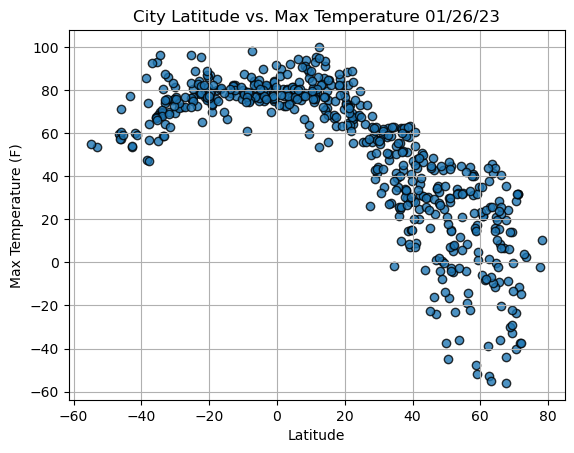

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

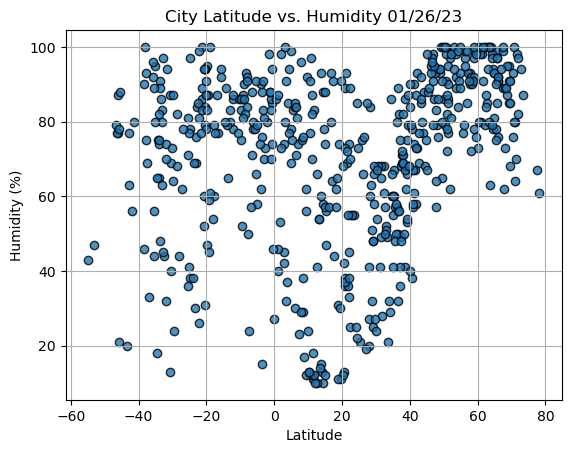

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

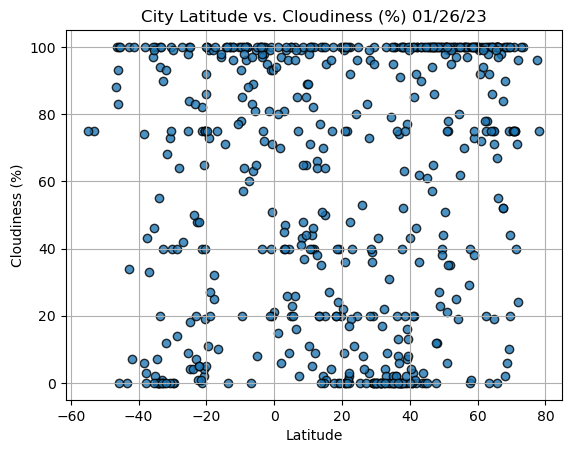

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

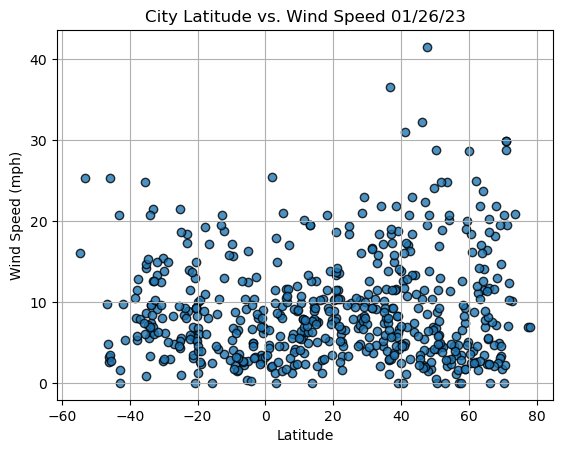

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()